In [2]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
columns = ["Date",
           "ApparentPower",
           "CurrentAC_L1", "CurrentAC_L2", "CurrentAC_L3",
           "CurrentDC_MPP1",
           "Energy",
           "VoltageAC_L1", "VoltageAC_L1L2", "VoltageAC_L2", "VoltageAC_L3", "VoltageDC_MPP1",
           "Consumed_Directly", "Consumption",
           "Energy_From_Battery", "Energy_From_Grid",
           "Energy_To_Battery", "Energy_To_Grid",
           "PV_Production"]


def load_cleaned_data():
    path_nan_rows = "CononsythFarm/Raw_data/15minutes_Full/raw_data_without_nan_rows.xlsx"
    if not os.path.exists(path_nan_rows):
        path_empty_columns = "CononsythFarm/Raw_data/15minutes_Full/raw_data_without_empty_columns.xlsx"
        if not os.path.exists(path_empty_columns):
            path = "CononsythFarm/Raw_data/15minutes_Full/full_raw_data.xlsx"
            if not os.path.exists(path):
                print(get_current_time(), "- Creating full raw dataset...")
                data = load_datasets_15mnts()
                print(get_current_time(), "- Done!")
            else:
                print(get_current_time(), "- Loading raw dataset exists on disk...\nLoading...")
                data = pd.read_excel(io=path,
                                     names=columns)
                print(get_current_time(), "- Loaded!")

            print(get_current_time(), "- Removing columns with all values NaN...")
            data = remove_empty_columns(data)
            print(get_current_time(), "- Done!")
        else:
            print(get_current_time(), "- Dataset without empty columns exists on disk...\nLoading...")
            data = pd.read_excel(io=path_empty_columns)
            print(get_current_time(), "- Loaded!")
        print(get_current_time(), "- Removing rows with all values NaN...")
        data = remove_empty_rows(data)
        print(get_current_time(), "- Done!")
    else:
        print(get_current_time(), "- Loading dataset without empty rows exists on disk...")
        data = pd.read_excel(io=path_nan_rows)
        print(get_current_time(), "- Loaded!")

    return remove_zeros_rows(remove_nan_rows(data))


def load_datasets_15mnts():
    data_files = os.listdir("CononsythFarm/Raw_data/North_Mains_Solar_15minutes")
    list_data = []

    for file in data_files:
        path = "CononsythFarm/Raw_data/North_Mains_Solar_15minutes/" + file
        data = pd.read_excel(io=path,
                             skiprows=2,
                             names=columns)
        list_data.append(data)

    full_data = pd.DataFrame(columns=columns)

    for dataset in list_data:
        full_data = full_data.append(dataset)

    full_data.to_excel('CononsythFarm/Raw_data/15minutes_full/full_raw_data.xlsx',
                       index=False)
    return full_data


def remove_empty_columns(dataset):
    columns_aux = columns[1:]
    columns_to_drop = []

    for column in columns_aux:
        uniques_values = dataset[column].unique()
        if len(uniques_values) < 3:
            columns_to_drop.append(column)

    dataset = dataset.drop(columns=columns_to_drop)
    dataset.to_excel('CononsythFarm/Raw_data/15minutes_Full/raw_data_without_empty_columns.xlsx',
                     index=False)
    return dataset


def remove_empty_rows(dataset):
    new_dataset = dataset.dropna(how='all',
                                 subset=dataset.columns[1:])
    new_dataset.to_excel('CononsythFarm/Raw_data/15minutes_Full/raw_data_without_nan_rows.xlsx',
                         index=False)

    return new_dataset


def remove_nan_rows(dataset):
    return dataset.dropna(how='any')


def remove_zeros_rows(dataset):
    return dataset.loc[(dataset[dataset.columns[1:]] != 0).all(axis=1)]


def get_current_time():
    now = datetime.now()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    return f'[{dt_string}]'


def soft_data_per_day(dataset):
    return dataset


In [3]:
data = load_cleaned_data()
data.head()

[21/07/2021 11:37:20] - Loading dataset without empty rows exists on disk...
[21/07/2021 11:37:36] - Loaded!


,Date,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
0,2012-01-01 08:45:00,75.0,0.05,0.16,0.08,2.97,3.44,246.0,429.0,247.0,247.0,271.0,3.44
1,2012-01-01 09:00:00,277.0,0.39,0.38,0.35,4.38,72.76,244.0,425.0,245.0,245.0,254.0,72.76
2,2012-01-01 09:15:00,701.0,0.95,0.95,0.92,4.65,180.22,246.0,429.0,248.0,248.0,280.0,180.22
3,2012-01-01 09:30:00,1470.0,2.00,2.01,1.96,6.73,376.11,245.0,426.0,246.0,246.0,282.0,376.11
4,2012-01-01 09:45:00,2575.0,3.46,3.48,3.42,9.84,658.64,247.0,430.0,248.0,248.0,300.0,658.64


In [4]:
data.describe()

,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
count,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000,109449.000000
mean,9780.941662,13.363471,13.479312,13.424470,36.258512,2427.356986,239.303146,415.583514,240.429223,239.815284,286.149564,2427.356986
std,9923.931667,13.449231,13.538113,13.498502,36.384327,2481.055505,6.054566,10.795008,6.367446,6.141435,19.000404,2481.055505
min,30.000000,0.010000,0.010000,0.010000,1.570000,0.040000,211.000000,365.000000,210.000000,211.000000,208.000000,0.040000
25%,1766.000000,2.450000,2.480000,2.460000,7.310000,436.530000,236.000000,409.000000,237.000000,236.000000,278.000000,436.530000
50%,6153.000000,8.500000,8.590000,8.530000,22.150000,1514.120000,240.000000,417.000000,241.000000,241.000000,289.000000,1514.120000
75%,15091.000000,20.690000,20.890000,20.780000,53.950000,3741.590000,243.000000,423.000000,245.000000,244.000000,298.000000,3741.590000
max,47408.000000,64.430000,64.900000,64.480000,185.600000,12029.330000,489.000000,848.000000,489.000000,484.000000,369.000000,12029.330000


# 2 - EDA: Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109449 entries, 0 to 128042
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            109449 non-null  datetime64[ns]
 1   ApparentPower   109449 non-null  float64       
 2   CurrentAC_L1    109449 non-null  float64       
 3   CurrentAC_L2    109449 non-null  float64       
 4   CurrentAC_L3    109449 non-null  float64       
 5   CurrentDC_MPP1  109449 non-null  float64       
 6   Energy          109449 non-null  float64       
 7   VoltageAC_L1    109449 non-null  float64       
 8   VoltageAC_L1L2  109449 non-null  float64       
 9   VoltageAC_L2    109449 non-null  float64       
 10  VoltageAC_L3    109449 non-null  float64       
 11  VoltageDC_MPP1  109449 non-null  float64       
 12  PV_Production   109449 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 11.7 MB


## 2.1 - Plotting Time Series

In [23]:
import seaborn as sns
data = pd.read_csv('../train_clean.csv')
data.head()

,Unnamed: 0,Date,year,month,day,hour,t-3,t-2,t-1,t
0,3,2011-09-30 15:00:00,2011,9,30,15,12280.79,3563.88,25597.76,21112.74
1,4,2011-09-30 16:00:00,2011,9,30,16,3563.88,25597.76,21112.74,12492.41
2,5,2011-09-30 17:00:00,2011,9,30,17,25597.76,21112.74,12492.41,5425.20
3,6,2011-09-30 18:00:00,2011,9,30,18,21112.74,12492.41,5425.20,667.78
4,7,2011-09-30 19:00:00,2011,9,30,19,12492.41,5425.20,667.78,0.00


In [24]:
data['aux'] = data['t'].shift(24)
data['aux2'] = data['Date'].shift(24)

In [26]:
data.head(27)

,Unnamed: 0,Date,year,month,day,hour,t-3,t-2,t-1,t,aux,aux2
0,3,2011-09-30 15:00:00,2011,9,30,15,12280.79,3563.88,25597.76,21112.74,NaN,NaN
1,4,2011-09-30 16:00:00,2011,9,30,16,3563.88,25597.76,21112.74,12492.41,NaN,NaN
2,5,2011-09-30 17:00:00,2011,9,30,17,25597.76,21112.74,12492.41,5425.20,NaN,NaN
3,6,2011-09-30 18:00:00,2011,9,30,18,21112.74,12492.41,5425.20,667.78,NaN,NaN
4,7,2011-09-30 19:00:00,2011,9,30,19,12492.41,5425.20,667.78,0.00,NaN,NaN
5,8,2011-09-30 20:00:00,2011,9,30,20,5425.20,667.78,0.00,0.00,NaN,NaN
6,9,2011-09-30 21:00:00,2011,9,30,21,667.78,0.00,0.00,0.00,NaN,NaN
7,10,2011-09-30 22:00:00,2011,9,30,22,0.00,0.00,0.00,0.00,NaN,NaN
8,11,2011-09-30 23:00:00,2011,9,30,23,0.00,0.00,0.00,0.00,NaN,NaN
9,12,2011-10-01 00:00:00,2011,10,1,0,0.00,0.00,0.00,0.00,NaN,NaN


In [21]:
data_datetime.head()

,Unnamed: 0,Date,year,month,day,hour,t-3,t-2,t-1,t
Date,,,,,,,,,,
2011-09-30 15:00:00,3,2011-09-30 15:00:00,2011,9,30,15,12280.79,3563.88,25597.76,21112.74
2011-09-30 16:00:00,4,2011-09-30 16:00:00,2011,9,30,16,3563.88,25597.76,21112.74,12492.41
2011-09-30 17:00:00,5,2011-09-30 17:00:00,2011,9,30,17,25597.76,21112.74,12492.41,5425.20
2011-09-30 18:00:00,6,2011-09-30 18:00:00,2011,9,30,18,21112.74,12492.41,5425.20,667.78
2011-09-30 19:00:00,7,2011-09-30 19:00:00,2011,9,30,19,12492.41,5425.20,667.78,0.00


In [11]:
color_labels = data['year'].unique()
color_labels

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [18]:
rgb_values = sns.color_palette("Set2", 6)
color_map = dict(zip(color_labels, rgb_values))

In [19]:
color_map

{2011: (0.4, 0.7607843137254902, 0.6470588235294118),
 2012: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 2013: (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 2014: (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 2015: (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 2016: (1.0, 0.8509803921568627, 0.1843137254901961)}

In [22]:
plt.plot(data_datetime['t'], 
        c=data_datetime['year'].map(color_map))
plt.show()

KeyboardInterrupt: 

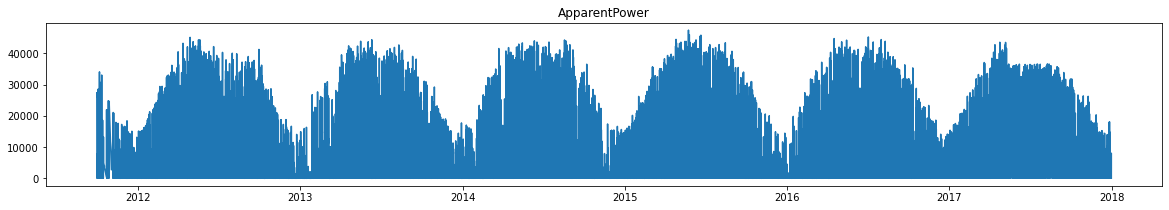

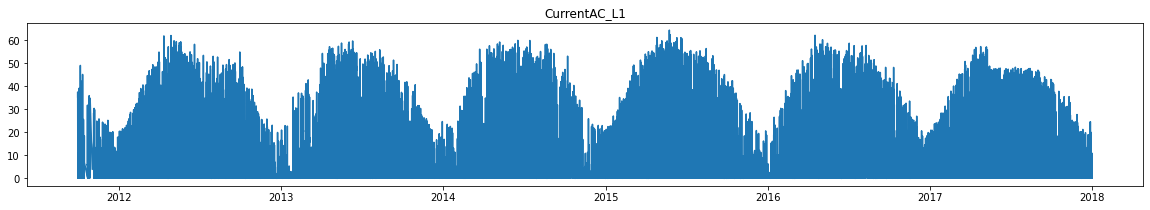

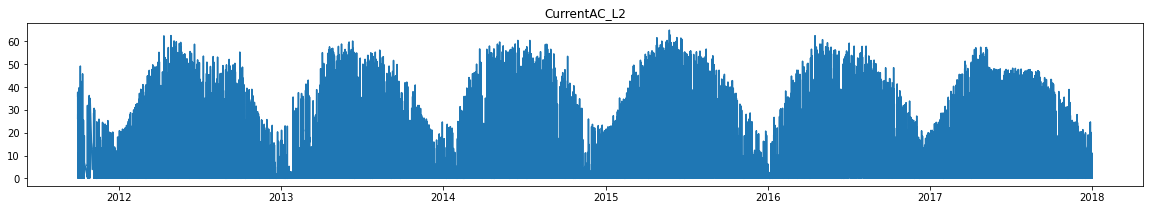

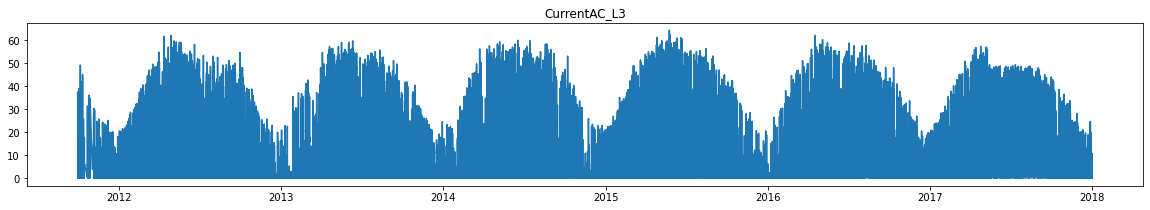

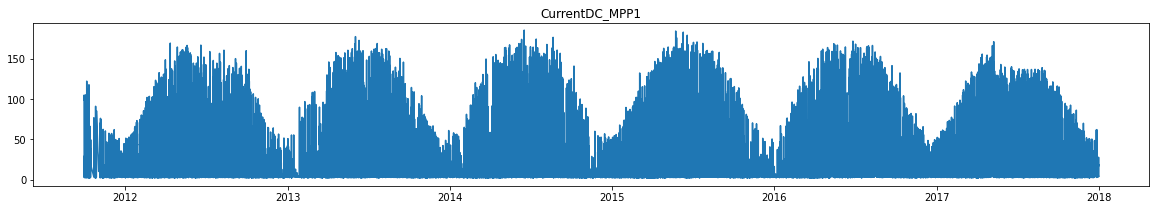

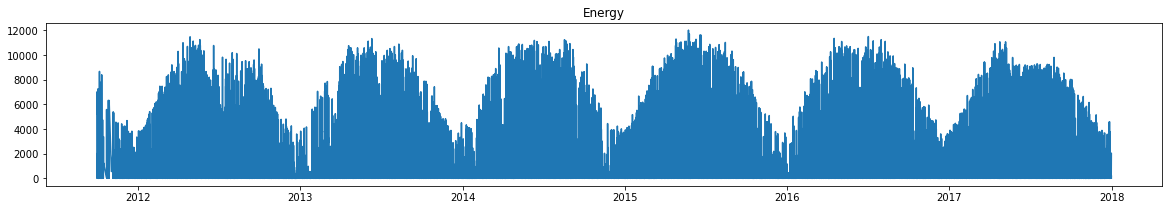

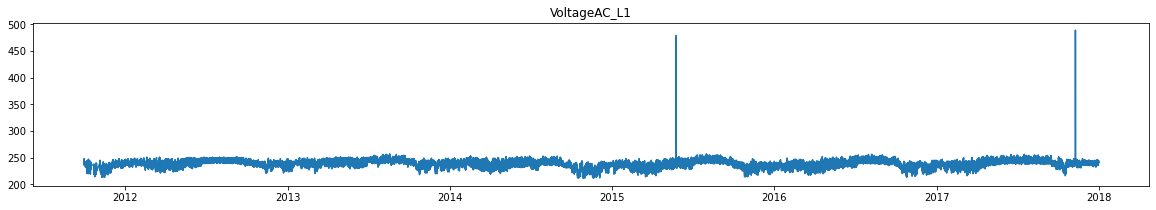

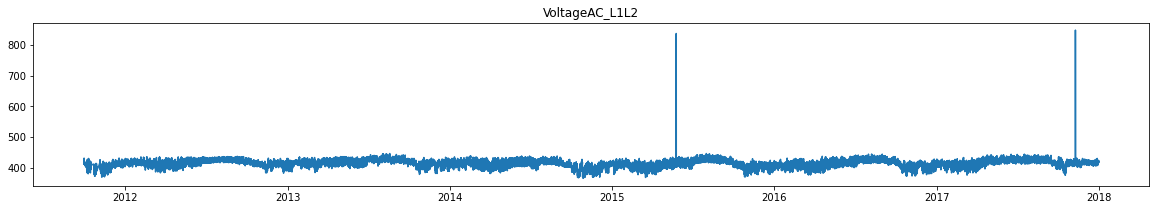

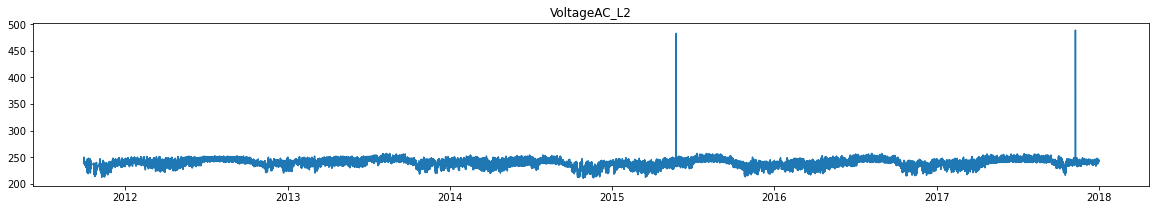

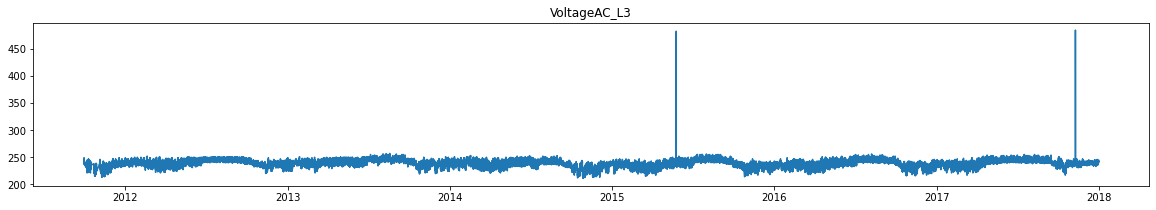

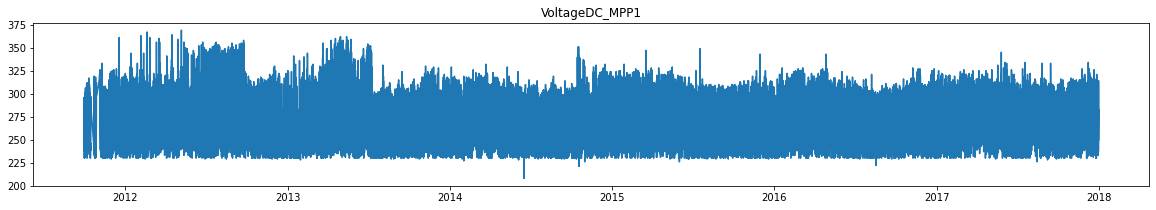

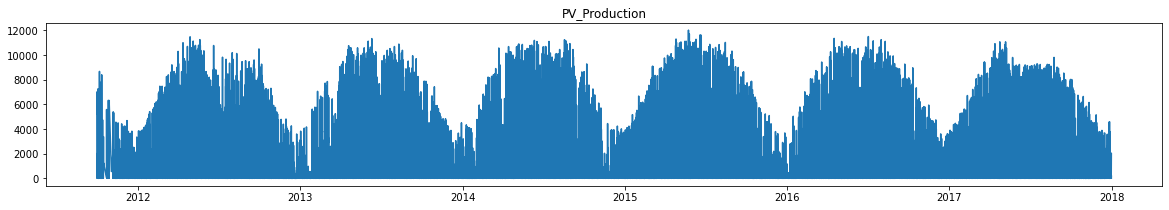

In [6]:
data_datetime = data.set_index(data['Date'])
data_datetime = data_datetime.sort_index() 

for i in range(1, data_datetime.shape[1]):
        plt.figure(figsize=(20,3))
        plt.title(data_datetime.columns[i])
        plt.plot(data_datetime[data_datetime.columns[i]])
        plt.show()

In [13]:
data_datetimedata_datetime["Date"] <= "2017-01-01"

Date
2011-09-30 12:00:00     True
2011-09-30 12:15:00     True
2011-09-30 13:45:00     True
2011-09-30 14:00:00     True
2011-09-30 14:15:00     True
                       ...  
2017-12-31 14:45:00    False
2017-12-31 15:00:00    False
2017-12-31 15:15:00    False
2017-12-31 15:30:00    False
2017-12-31 15:45:00    False
Name: Date, Length: 109449, dtype: bool

In [11]:
data_datetime.loc['2017-01-01':'2017-12-31']

,Date,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
Date,,,,,,,,,,,,,
2017-01-01 08:45:00,2017-01-01 08:45:00,119.0,0.15,0.19,0.14,4.41,15.98,241.0,420.0,242.0,241.0,253.0,15.98
2017-01-01 09:00:00,2017-01-01 09:00:00,740.0,1.05,1.02,1.00,5.61,188.54,239.0,417.0,240.0,240.0,256.0,188.54
2017-01-01 09:15:00,2017-01-01 09:15:00,1896.0,2.65,2.63,2.57,7.60,487.52,240.0,419.0,242.0,240.0,303.0,487.52
2017-01-01 09:30:00,2017-01-01 09:30:00,2914.0,4.05,4.07,3.99,10.68,742.97,239.0,418.0,241.0,239.0,309.0,742.97
2017-01-01 09:45:00,2017-01-01 09:45:00,1540.0,2.17,2.16,2.12,6.59,394.93,238.0,415.0,239.0,238.0,299.0,394.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 14:45:00,2017-12-31 14:45:00,3304.0,4.48,4.62,4.54,11.93,840.13,241.0,418.0,242.0,242.0,302.0,840.13
2017-12-31 15:00:00,2017-12-31 15:00:00,2183.0,2.92,3.09,3.02,8.45,555.34,240.0,417.0,241.0,241.0,292.0,555.34
2017-12-31 15:15:00,2017-12-31 15:15:00,909.0,1.20,1.30,1.22,4.55,229.53,242.0,419.0,244.0,243.0,279.0,229.53


In [7]:
data_datetime_outliers = data_datetime.loc[data_datetime['VoltageAC_L1'] > 400]
data_datetime_outliers

,Date,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
Date,,,,,,,,,,,,,
2015-05-25 17:45:00,2015-05-25 17:45:00,17234.0,22.93,23.92,24.52,33.31,2901.70,479.0,837.0,483.0,482.0,302.3,2901.70
2017-11-09 11:30:00,2017-11-09 11:30:00,26252.0,35.52,38.93,32.59,34.70,2561.81,489.0,848.0,489.0,484.0,300.0,2561.81


## 2.2 - Univariate Analysis

In [8]:
def make_analysis(dataset, column, alpha=0.05, qq_plot=True, histogram=False, density=False):    
    if density:
        print(get_current_time(), "- Plotting distribution of", column, "column...")
        dataset[column].plot.kde()
        plt.show()
          
    if histogram:
        print(get_current_time(), "- Plotting Histogram of", column, "column...")
        plt.hist(dataset[column])
        plt.show()

    if qq_plot:
        print(get_current_time(), "- Plotting QQPlot of", column, "column...")
        qqplot(dataset[column], line='s')
        plt.show()

## 2.3 - Correlation Matrix

In [9]:
corr = data_datetime.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
ApparentPower,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CurrentAC_L1,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CurrentAC_L2,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CurrentAC_L3,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan
CurrentDC_MPP1,1.00,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan
Energy,0.99,0.99,0.99,0.99,0.99,nan,nan,nan,nan,nan,nan,nan
VoltageAC_L1,0.41,0.39,0.39,0.39,0.41,0.40,nan,nan,nan,nan,nan,nan
VoltageAC_L1L2,0.39,0.37,0.37,0.37,0.39,0.37,0.99,nan,nan,nan,nan,nan
VoltageAC_L2,0.37,0.35,0.35,0.35,0.37,0.35,0.99,0.99,nan,nan,nan,nan
VoltageAC_L3,0.36,0.34,0.34,0.34,0.37,0.34,0.99,0.99,0.99,nan,nan,nan


In [10]:
data_datetime_outliers = data_datetime.loc[data_datetime['VoltageAC_L1'] < 400]

In [11]:
x_values = [(col, data_datetime_outliers[col]) for col in data_datetime.columns[1:]]
y = data_datetime_outliers['PV_Production']

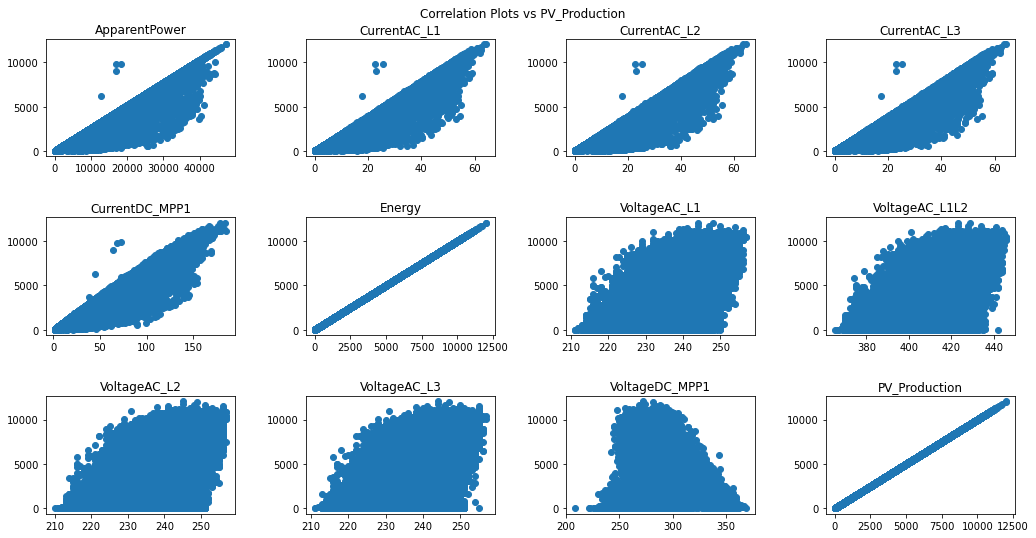

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=4.0)

fig.suptitle('Correlation Plots vs PV_Production')

cont = 0
for row in range(0, 3):
    for column in range(0, 4):
        axs[row, column].scatter(x_values[cont][1], y)
        axs[row, column].set_title(x_values[cont][0])
        cont+=1


Vemos que la relacción entre las variables *Energy* y *PV_Production* es totalmente lineal. Esto se debe a que son la misma varaible con distinto nombre, por lo que habrá que eliminarla durante la fase de entrenamiento.

In [13]:
data_datetime

,Date,ApparentPower,CurrentAC_L1,CurrentAC_L2,CurrentAC_L3,CurrentDC_MPP1,Energy,VoltageAC_L1,VoltageAC_L1L2,VoltageAC_L2,VoltageAC_L3,VoltageDC_MPP1,PV_Production
Date,,,,,,,,,,,,,
2011-09-30 12:00:00,2011-09-30 12:00:00,26177.0,35.36,36.06,35.74,98.68,5269.04,243.0,422.0,244.0,243.0,294.0,5269.04
2011-09-30 12:15:00,2011-09-30 12:15:00,27404.0,37.54,37.72,37.60,104.88,7011.75,242.0,419.0,243.0,242.0,275.0,7011.75
2011-09-30 13:45:00,2011-09-30 13:45:00,19097.0,25.37,25.92,25.97,72.06,3563.88,246.0,427.0,247.0,246.0,296.0,3563.88
2011-09-30 14:00:00,2011-09-30 14:00:00,23531.0,31.69,31.75,31.67,90.23,5971.99,246.0,428.0,247.0,247.0,275.0,5971.99
2011-09-30 14:15:00,2011-09-30 14:15:00,24706.0,33.36,33.56,33.54,94.58,6314.80,245.0,425.0,246.0,245.0,276.0,6314.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 14:45:00,2017-12-31 14:45:00,3304.0,4.48,4.62,4.54,11.93,840.13,241.0,418.0,242.0,242.0,302.0,840.13
2017-12-31 15:00:00,2017-12-31 15:00:00,2183.0,2.92,3.09,3.02,8.45,555.34,240.0,417.0,241.0,241.0,292.0,555.34
2017-12-31 15:15:00,2017-12-31 15:15:00,909.0,1.20,1.30,1.22,4.55,229.53,242.0,419.0,244.0,243.0,279.0,229.53


In [14]:
data_datetime = data_datetime.drop(columns=['Energy'])

# Modelos Estado del Arte

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPRegressor

In [17]:
X = ["ApparentPower",
     "CurrentAC_L1", "CurrentAC_L2", "CurrentAC_L3",
     "CurrentDC_MPP1",
     "VoltageAC_L1", "VoltageAC_L1L2", "VoltageAC_L2", "VoltageAC_L3", "VoltageDC_MPP1"]

y = ["PV_Production"]

In [18]:
scaler = StandardScaler()
scaler.fit(data_datetime[X].values)

df_train_esc = scaler.transform(data_datetime[X].values)

print(df_train_esc.shape)

(109449, 10)


In [19]:
# Función que obtiene el MAE, RMSE y R2 de VC con repetición
def entrena_model(model, num_folds=10, num_bags=10):
    np.random.seed(2021)
    X_tot = df_train_esc.copy()
    y_tot = data_datetime[y].values.reshape(-1)

    
    # Creamos arrays para las predicciones
    preds_val = np.empty((len(X_tot),num_bags))
    preds_val[:] = np.nan
    
    # Entrena y extrae la predicciones con validación cruzada repetida
    folds = RepeatedKFold(n_splits=num_folds, n_repeats=num_bags, random_state=2021)  
    
    for niter, (train_index, val_index) in enumerate(folds.split(X_tot, y_tot)):
        nbag = niter//num_folds #Extrae el número de repetición (bag)
        X_train, X_val = X_tot[train_index], X_tot[val_index]
        y_train, y_val = y_tot[train_index], y_tot[val_index]
        model.fit(X_train, y_train)
        preds_val[val_index,nbag] = model.predict(X_val)
        
    # Promedia las predicciones
    preds_val_mean = preds_val.mean(axis=1) 
    
    # Extrae las métricas
    mae_val = mean_absolute_error(y_tot, preds_val_mean) 
    rmse_val = np.sqrt(mean_squared_error(y_tot, preds_val_mean))
    r2_val = r2_score(y_tot, preds_val_mean)
    
    return mae_val, rmse_val, r2_val

## Regresión Lineal

In [20]:
modelo_base = Ridge()
mae_val, rmse_val, r2_val = entrena_model(modelo_base)

print(get_current_time(), 
      '- RIDGE -> Val:[MAE={:.3f}, RMSE={:,.3f}, R2={:,.3f}]'.format(mae_val, rmse_val, r2_val))

rmse_minimo = rmse_val
alpha_minimo = 1.0
solver_minimo = 'auto'

print("")
print(get_current_time(), "Trying to improve base model...\n")

for alpha in np.arange(0, 10, 0.5):
    model = Ridge(alpha=alpha)
    mae_val, rmse_val, r2_val = entrena_model(model)
    if rmse_val < rmse_minimo:
        alpha_minimo = alpha
        rmse_minimo = rmse_val
        print(get_current_time(), 
              'RIDGE con alpha={} -> Val:[MAE={:.3f}, RMSE={:,.3f}, R2={:,.3f}]'.format(alpha,
                                                                 mae_val, rmse_val, r2_val))
print("")
print(get_current_time(),"Ended of greedy search...\n")

[14/07/2021 16:14:22] - RIDGE -> Val:[MAE=155.632, RMSE=354.717, R2=0.980]

[14/07/2021 16:14:22] Trying to improve base model...

[14/07/2021 16:14:23] RIDGE con alpha=0.0 -> Val:[MAE=155.493, RMSE=354.716, R2=0.980]
[14/07/2021 16:14:25] RIDGE con alpha=0.5 -> Val:[MAE=155.563, RMSE=354.715, R2=0.980]

[14/07/2021 16:15:03] Ended of greedy search...



## KNN

In [26]:
modelo_base = KNeighborsRegressor(n_jobs=8)
mae_val, rmse_val, r2_val = entrena_model(modelo_base)
                                          
print('KNN -> Val:[MAE={:.3f}, RMSE={:,.3f}, R2={:,.3f}]'.format(mae_val, rmse_val, r2_val))

n_vecinos_minimo = 5
pesos_minimo = 'uniform'
rmse_minimo = rmse_val

print("")
print(get_current_time(), "Trying to improve base model...\n")

for n_vecinos in np.arange(1,35, 1):
    for weight in ['uniform', 'distance']:
        model = KNeighborsRegressor(n_neighbors=n_vecinos, weights=weight, n_jobs=8)
        mae_val, rmse_val, r2_val = entrena_model(model)
        if rmse_val-rmse_minimo < 0:
            n_vecinos_minimo = n_vecinos
            rmse_minimo = rmse_val
            pesos_minimo = weight
            print('KNN(n_neighbors={}, weights={}) -> Val:[MAE={:.3f}, RMSE={:,.3f}, R2={:,.3f}]'.format(n_vecinos, weight,
                mae_val, rmse_val, r2_val))
            
print("")
print(get_current_time(),"Ended of greedy search...\n")

KNN -> Val:[MAE=65.196, RMSE=182.679, R2=0.995]

[14/07/2021 16:34:33] Trying to improve base model...

KNN(n_neighbors=4, weights=distance) -> Val:[MAE=64.662, RMSE=180.052, R2=0.995]
KNN(n_neighbors=5, weights=distance) -> Val:[MAE=63.275, RMSE=178.946, R2=0.995]
KNN(n_neighbors=6, weights=distance) -> Val:[MAE=62.305, RMSE=178.087, R2=0.995]
KNN(n_neighbors=7, weights=distance) -> Val:[MAE=61.674, RMSE=177.840, R2=0.995]
KNN(n_neighbors=8, weights=distance) -> Val:[MAE=61.296, RMSE=177.813, R2=0.995]

[14/07/2021 17:39:47] Ended of greedy search...



## ANN

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
modelo_base = MLPRegressor()
mae_val, rmse_val, r2_val = entrena_model(modelo_base)

num_neuronas = 100
activacion = 'relu'
solver = 'adam'

print('ANN(hidden_layer_sizes=({},), activation={}, solver={}) -> Val:[MAE={:.3f},RMSE={:,.3f},R2={:,.3f}]'.format(num_neuronas, activacion, solver,
                                                                              mae_val, rmse_val, r2_val))

num_capas = 100
pesos_minimo = 'uniform'
rmse_minimo = rmse_val

print("")
print(get_current_time(), "Trying to improve base model...\n")

for solver in ['adam', 'lbfgs']:
    for activacion in ['relu', 'logistic']:
        for num_neuronas in np.arange(1, 500, 10):
            model =  MLPRegressor(hidden_layer_sizes=(num_neuronas,),
                                  solver=solver,
                                  activation=activacion)

            mae_val, rmse_val, r2_val = entrena_model(model)

            print('ANN(hidden_layer_sizes=({},), activation={}, solver={}) -> Val:[MAE={:.3f},RMSE={:,.3f},R2={:,.3f}]'.format(num_neuronas, activacion,
                                                                                  solver, mae_val, rmse_val, r2_val))
        
print("")
print(get_current_time(),"Ended of greedy search...\n")